# CSE1015 - Machine Learning Essentials
# Pinni Venkata Abhiram
# 20BAI1132

### Lab - 7 
### Prediction of Strain value using linear and polynomial regression

#### Importing the required modules

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression as linearreg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

### Importing of train data and analysing it

In [79]:
df = pd.read_csv('trainStrain.csv')

#### Ignorning the warnings

In [80]:
warnings.filterwarnings('ignore')

### Preprocessing the data for train set

In [81]:
df.columns


Index(['Load', 'Actuator', 'Time', 'Strain'], dtype='object')

In [82]:
df.head(10)

,Load,Actuator,Time,Strain
0,-1.90042,0.000000,0.101,0.000006
1,-1.90527,0.006944,0.168,0.000002
2,-1.85161,0.006944,0.234,0.000001
3,-1.58909,0.006944,0.301,0.000008
4,-1.36584,0.013889,0.368,0.000009
5,-1.13887,0.020833,0.434,0.000012
6,-0.91174,0.034722,0.501,0.000016
7,-0.65850,0.048611,0.568,0.000013
8,-0.40833,0.062500,0.634,0.000016
9,-0.07415,0.076389,0.701,0.000024


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7368 entries, 0 to 7367
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Load      7368 non-null   float64
 1   Actuator  7368 non-null   float64
 2   Time      7368 non-null   float64
 3   Strain    7368 non-null   float64
dtypes: float64(4)
memory usage: 230.4 KB


In [84]:
df.describe()

,Load,Actuator,Time,Strain
count,7368.000000,7368.000000,7368.000000,7368.000000
mean,129.573679,19.676954,122.940885,0.003217
std,30.083359,12.201710,71.024682,0.012886
min,-2.500420,0.000000,0.101000,-0.035840
25%,105.477175,7.770834,61.486500,0.000379
50%,139.309250,17.447915,122.869000,0.000460
75%,155.505900,30.342015,184.266500,0.003682
max,159.368800,44.465280,251.531000,0.211319


#### From the above describe function we can get the values of standard deviation , percentile value and many more

#### Normalisation of data using the max absolute scaling method

In [85]:
def maximum_absolute_scaling(dataFrame):
    dataFrame_scaled = dataFrame.copy()
    for column in dataFrame_scaled.columns:
        dataFrame_scaled[column] = dataFrame_scaled[column]  / dataFrame_scaled[column].abs().max()
    return dataFrame_scaled
    
# call the maximum_absolute_scaling function
df_scaled = maximum_absolute_scaling(df)

df_scaled

,Load,Actuator,Time,Strain
0,-0.011925,0.000000,0.000402,0.000028
1,-0.011955,0.000156,0.000668,0.000010
2,-0.011618,0.000156,0.000930,0.000007
3,-0.009971,0.000156,0.001197,0.000036
4,-0.008570,0.000312,0.001463,0.000041
...,...,...,...,...
7363,0.639864,0.998594,0.998939,0.001788
7364,0.638886,0.998907,0.999205,0.001789
7365,0.637644,0.999219,0.999467,0.001805
7366,0.635310,0.999688,0.999734,0.001795


In [86]:
df_scaled.columns

Index(['Load', 'Actuator', 'Time', 'Strain'], dtype='object')

#### Checking for null rows , i.e. NaN rows and dropping them if there are any

In [87]:
df_scaled.isnull().sum()

Load        0
Actuator    0
Time        0
Strain      0
dtype: int64

#### Finding the correlation for the train dataset

In [88]:
correlation = df_scaled.corr()
correlation['Strain']

Load       -0.112439
Actuator   -0.195955
Time       -0.162852
Strain      1.000000
Name: Strain, dtype: float64

#### The target var for the question is strain so we find the correlation between the strain and the other variables
#### In the aboue result there is a negetive correlation but it's significant , the negetive correlation means that means the values of the input variable and the output variable change in the opposite directions.
#### Therefore we have significant correlations so we don't drop any columns , all columns are important

#### Plots for the train dataset (Exploratory analysis)

#### Heatmap for correlation
#### In this heatmap we can see that the correlation color is quite low and it says that there are parts which have low correlation value and high correlation value regions too so we can't remove any column

<AxesSubplot:>

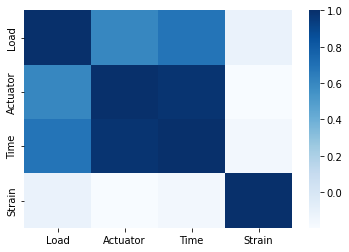

In [89]:
sns.heatmap(df_scaled.corr() , cmap="Blues")

#### Pairplot
#### Pairplot is usually a grid of plots for each variable in your dataset. Hence you can quickly see how all the variables are related. This can help to infer which variables are useful, which have skewed distribution etc.

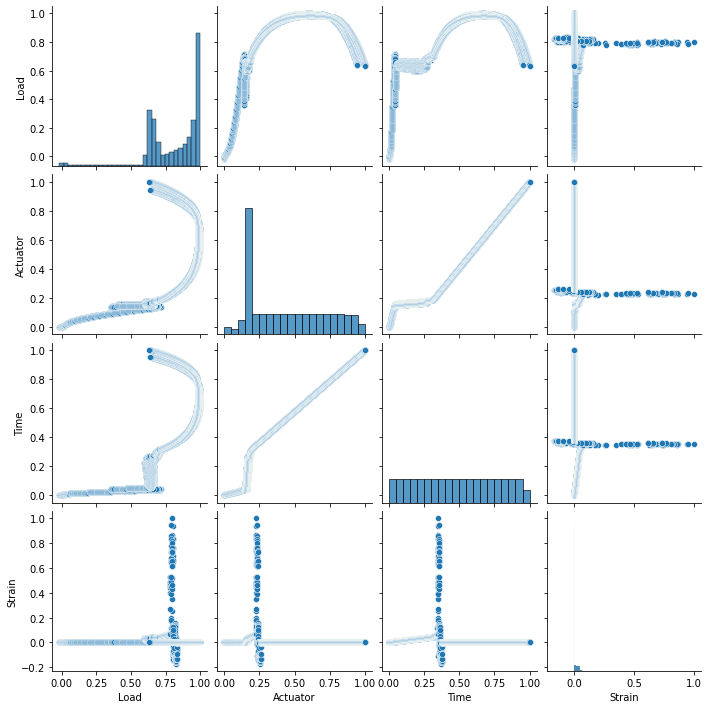

In [90]:
sns.pairplot(df_scaled)

#### Distplot

<AxesSubplot:xlabel='Load', ylabel='Density'>

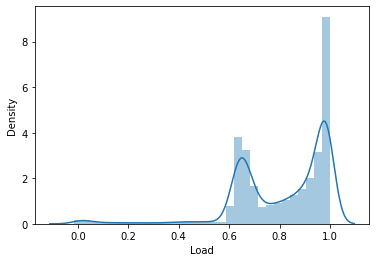

In [91]:
sns.distplot(df_scaled['Load'])

<AxesSubplot:xlabel='Strain', ylabel='Density'>

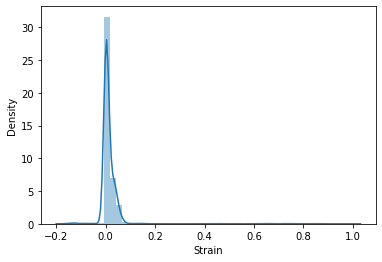

In [92]:
sns.distplot(df_scaled['Strain'])

#### Preprocessing for the test dataset

In [93]:
df2 = pd.read_csv('testStrain.csv')

In [94]:
df2.head(10)

,Load,Actuator,Time,Strain
0,-3.06825,0.000000,0.090,0.000001
1,-2.84884,0.000000,0.157,0.000002
2,-2.38585,0.000000,0.223,0.000008
3,-1.91418,0.000000,0.290,0.000012
4,-1.61167,0.006944,0.357,0.000012
5,-1.30291,0.020833,0.423,0.000018
6,-1.24391,0.027778,0.490,0.000018
7,-1.07775,0.041667,0.557,0.000018
8,-0.85787,0.048611,0.623,0.000024
9,-0.67655,0.062500,0.690,0.000025


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Load      3544 non-null   float64
 1   Actuator  3544 non-null   float64
 2   Time      3544 non-null   float64
 3   Strain    3544 non-null   float64
dtypes: float64(4)
memory usage: 110.9 KB


In [96]:
df2.describe()

,Load,Actuator,Time,Strain
count,3544.000000,3544.000000,3544.000000,3544.000000
mean,128.847911,19.503096,118.230345,-0.184297
std,29.834837,11.508828,68.237601,0.197000
min,-3.068250,0.000000,0.090000,-0.386398
25%,108.050800,8.527778,59.140250,-0.386396
50%,136.938750,17.166665,118.251000,-0.013446
75%,154.519600,29.565973,177.300750,0.003765
max,157.671400,41.972220,236.351000,0.240702


#### Normalisation of the data using maximum absolute scaling

In [97]:
df2_scaled = maximum_absolute_scaling(df2)
df2_scaled

,Load,Actuator,Time,Strain
0,-0.019460,0.000000,0.000381,0.000003
1,-0.018068,0.000000,0.000664,0.000004
2,-0.015132,0.000000,0.000944,0.000021
3,-0.012140,0.000000,0.001227,0.000031
4,-0.010222,0.000165,0.001510,0.000031
...,...,...,...,...
3539,0.647656,0.998677,0.998870,-0.999995
3540,0.646519,0.999007,0.999154,-0.999995
3541,0.644853,0.999338,0.999437,-0.999995
3542,0.641614,0.999669,0.999717,-0.999995


#### Data Cleaning for the test dataset

In [98]:
df2_scaled.isnull().sum()

Load        0
Actuator    0
Time        0
Strain      0
dtype: int64

#### There are no null rows so no need to drop the rows 

#### There are no unnessecary columns in our dataset when we analysed for the train dataset so we don't have to drop any columns and directly go for getting the correlation and correlation heatmap

In [99]:
corr = df2_scaled.corr()
corr['Strain']

Load       -0.615589
Actuator   -0.858181
Time       -0.845092
Strain      1.000000
Name: Strain, dtype: float64

#### The target var for the question is strain so we find the correlation between the strain and the other variables
#### In the aboue result there is a negetive correlation but it's significant , the negetive correlation means that means the values of the input variable and the output variable change in the opposite directions.
#### Therefore we have significant correlations so we don't drop any columns , all columns are important

In [100]:
df2_scaled.columns

Index(['Load', 'Actuator', 'Time', 'Strain'], dtype='object')

#### Explanatory analysis i.e. plots for the test dataset

#### Heatmap for correlation

#### In this heatmap we can see that the correlation color is quite low but it's not pure white (i.e. 0 correlation) and it says that there are parts which have low correlation value and high correlation value regions too so we can't remove any column 

<AxesSubplot:>

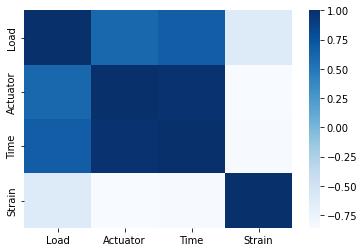

In [101]:
sns.heatmap(df2_scaled.corr() , cmap="Blues")

#### Pairplot
#### Pairplot is usually a grid of plots for each variable in your dataset. Hence you can quickly see how all the variables are related. This can help to infer which variables are useful, which have skewed distribution etc.

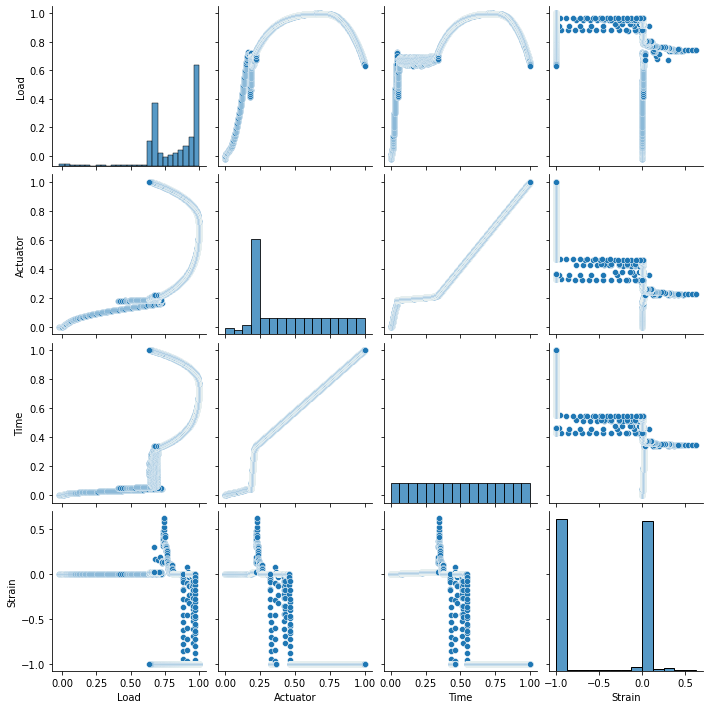

In [102]:
sns.pairplot(df2_scaled)

#### Displot

<AxesSubplot:xlabel='Load', ylabel='Density'>

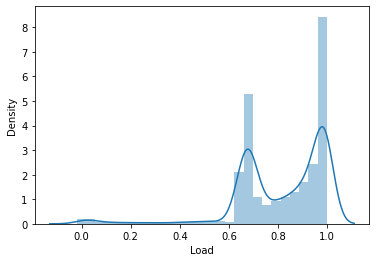

In [103]:
sns.distplot(df2_scaled['Load'])

<AxesSubplot:xlabel='Strain', ylabel='Density'>

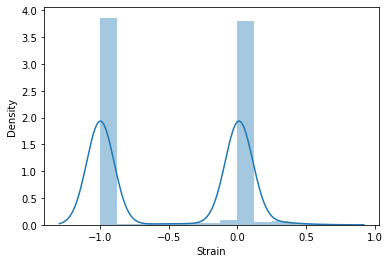

In [104]:
sns.distplot(df2_scaled['Strain'])

#### Linear Regression model

In [105]:
df_scaled.columns

Index(['Load', 'Actuator', 'Time', 'Strain'], dtype='object')

#### Getting the predicted value and train variables in two different dataframes

In [106]:
X = df_scaled.drop(['Strain'],axis=1)
Y = df_scaled['Strain']

In [107]:
X.head

<bound method NDFrame.head of           Load  Actuator      Time
0    -0.011925  0.000000  0.000402
1    -0.011955  0.000156  0.000668
2    -0.011618  0.000156  0.000930
3    -0.009971  0.000156  0.001197
4    -0.008570  0.000312  0.001463
...        ...       ...       ...
7363  0.639864  0.998594  0.998939
7364  0.638886  0.998907  0.999205
7365  0.637644  0.999219  0.999467
7366  0.635310  0.999688  0.999734
7367  0.631071  1.000000  1.000000

[7368 rows x 3 columns]>

In [108]:
Y.head

<bound method NDFrame.head of 0       0.000028
1       0.000010
2       0.000007
3       0.000036
4       0.000041
          ...   
7363    0.001788
7364    0.001789
7365    0.001805
7366    0.001795
7367    0.001789
Name: Strain, Length: 7368, dtype: float64>

#### Importing the linear regression module

In [109]:
linear_reg_model = linearreg()

#### Fitting the train dataset in the module

In [110]:
linear_reg_model.fit(X,Y)

LinearRegression()

In [111]:
intercept = linear_reg_model.intercept_
intercept

0.05511739260609566

#### Coefficients of the linear regression model

In [112]:
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns = ['coef']).sort_values(by = 'coef', ascending = False)
coefficients

,coef
Time,0.227245
Load,-0.048192
Actuator,-0.252603


#### Linear regression equation is will be

In [113]:
reg_equation = "Y = " + str(intercept.round(5)) + " + "
reg_equation += "(" + str(coefficients.coef['Time'].round(5)) + ")" + X.columns[0]
for i in range(1, len(X.columns)):
    col = X.columns[i]
    reg_equation += " + (" + str(coefficients.coef[col].round(5)) + ")" + col
print(reg_equation)

Y = 0.05512 + (0.22724)Load + (-0.2526)Actuator + (0.22724)Time


#### From the regression equation, it is evident that the variables P2, P3, P4 and P8 move in opposite direction as compared to Y since they have the negative correlation coefficient. the variables P6 move in the same direction as compared to Y since they have the positive correlation coefficient. 

#### Summary of result using the statsmodels api

In [114]:
result = sm.OLS(Y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Strain   R-squared (uncentered):                   0.093
Model:                            OLS   Adj. R-squared (uncentered):              0.092
Method:                 Least Squares   F-statistic:                              250.9
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                   4.99e-155
Time:                        11:30:54   Log-Likelihood:                          10291.
No. Observations:                7368   AIC:                                 -2.058e+04
Df Residuals:                    7365   BIC:                                 -2.056e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### The p statistic values of all columns are 0 so we move on to check the Variance Inflation Factor or VIF value
#### Based off of the VIF Values, we drop the ones with the highest VIF values. 
#### Drop unnecessary input variables

In [115]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Load,7.642338
1,Actuator,97.674635
2,Time,122.669998


#### The time factor in here is having a huge vif value so we drop it

In [116]:
X = X.drop(columns='Time')

In [117]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,Load,5.236635
1,Actuator,5.236635


#### Now that we have the VIF values sorted out the remaining columns are load and actuator 

In [118]:
result = sm.OLS(Y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Strain   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.082
Method:                 Least Squares   F-statistic:                              328.6
Date:                Thu, 03 Mar 2022   Prob (F-statistic):                   2.03e-137
Time:                        11:30:54   Log-Likelihood:                          10248.
No. Observations:                7368   AIC:                                 -2.049e+04
Df Residuals:                    7366   BIC:                                 -2.048e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### We calculate the linear regression model again 

In [119]:
regression_model = linearreg()
regression_model.fit(X,Y)
print("Intercept : ",regression_model.intercept_)
print("Coefficients : ",regression_model.coef_)

x_train = np.column_stack((X['Load'],X['Actuator'])) 
y_train = Y
x_train = sm.add_constant(x_train)
estimate = sm.OLS(y_train, x_train).fit()
print(estimate.summary())

Intercept :  0.032805781754241016
Coefficients :  [ 0.0026777  -0.04465247]
                            OLS Regression Results                            
Dep. Variable:                 Strain   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     147.2
Date:                Thu, 03 Mar 2022   Prob (F-statistic):           2.03e-63
Time:                        11:30:54   Log-Likelihood:                 10300.
No. Observations:                7368   AIC:                        -2.059e+04
Df Residuals:                    7365   BIC:                        -2.057e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

#### Final Linear Regression equation will be

In [120]:
print("Regression Equation: ")
yx = f"Y = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})Load + ({regression_model.coef_[1].round(3)})Actuator"
print(yx)

Regression Equation: 
Y = 0.033+ (0.003)Load + (-0.045)Actuator


#### Performance Metrics for Linear Regression

#### Scatter plot for load

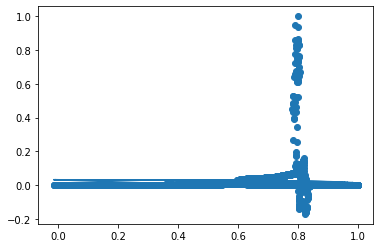

In [121]:
plt.scatter(X['Load'],Y)
eq = X*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(X['Load'], eq)

#### Scatter plot for Actuator

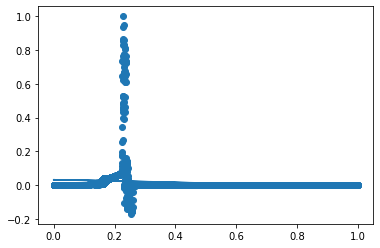

In [122]:
plt.scatter(X['Actuator'],Y)
eq = X*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(X['Actuator'], eq)

#### Finding and comparing the prediction values with actual values

In [123]:
X_test = df2_scaled[['Load', 'Actuator']]
Y_test = df2_scaled['Strain']

In [124]:
X_test.head(5)

,Load,Actuator
0,-0.019460,0.000000
1,-0.018068,0.000000
2,-0.015132,0.000000
3,-0.012140,0.000000
4,-0.010222,0.000165


In [125]:
Y_test.head(5)

0    0.000003
1    0.000004
2    0.000021
3    0.000031
4    0.000031
Name: Strain, dtype: float64

In [126]:
predictions = regression_model.predict(X_test)
print(predictions)

[ 0.03275367  0.0327574   0.03276526 ... -0.01009041 -0.01011387
 -0.01015029]


#### Scatterplot of the predicted values

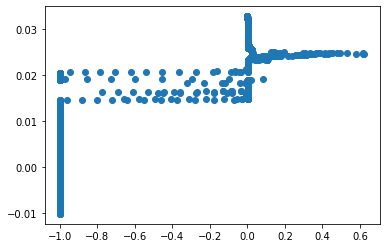

In [127]:
plt.scatter(Y_test, predictions)

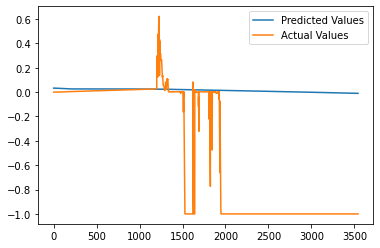

In [128]:
plt.plot(predictions, label = 'Predicted Values')
plt.plot(Y_test, label = 'Actual Values')
plt.legend()

#### Comparing the linear regression predicted vs actual values


In [129]:
predictions_list = predictions.tolist()
Y_test_list = Y_test.tolist()
print("Actual\tPredicted")
for i in range(len(Y_test_list)):
    print(Y_test_list[i], "\t" ,predictions_list[i])

Actual	Predicted
2.6138867885776566e-06 	 0.03275367434889917
4.477251627959748e-06 	 0.03275740053998727
2.0988734510262172e-05 	 0.03276526339588207
3.1314881328504593e-05 	 0.032773273662280694
3.0538479312095397e-05 	 0.03277102369396607
4.6842921656688695e-05 	 0.032761491375983234
4.6325320312415895e-05 	 0.03275510486779854
4.73605230009615e-05 	 0.03274315080582426
6.262976265700919e-05 	 0.0327394975506512
6.4441367361964e-05 	 0.032727800947575304
6.23709619848728e-05 	 0.03271724337934869
8.100461037869371e-05 	 0.032700745315550915
8.592182314928534e-05 	 0.03268923331526035
8.773342785424015e-05 	 0.03267190669574129
0.00010455547154310626 	 0.0326554241942244
0.0001112842890186527 	 0.03263722719040447
0.00011853070783847195 	 0.03261847408555368
0.00013664675488802007 	 0.03259432028875393
0.0001415639676586117 	 0.032568236348406776
0.00015113959252765856 	 0.032542418969726455
0.0001772784604134351 	 0.03251777647653752
0.00018193687251189035 	 0.032490434021448134
0.0

#### Final Evaluation metrics and tabulations for linear regression

In [131]:
MAE = metrics.mean_absolute_error(Y_test, predictions)
MSE = metrics.mean_squared_error(Y_test,predictions)
RMSE = np.sqrt(MSE)
R_squared = result.rsquared
adjusted_R_squared = result.rsquared_adj

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print("Adjusted R squared value : " , adjusted_R_squared)

MSE (Mean Squared Error) :  0.49089390550979306
MAE (Mean Absolute Error):  0.5030271563547885
RMSE (Root Mean Squared Error ) :  0.7006382129956894
Adjusted R squared value :  0.08166011217622104


In [132]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[X.columns[0],X.columns[1]], yx, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                                      MSE       MAE      RMSE    R-Squared    Adjusted R-Squared
----------------------  -----------------------------------------  --------  --------  --------  -----------  --------------------
['Load', 'Actuator']    Y = 0.033+ (0.003)Load + (-0.045)Actuator  0.490894  0.503027  0.700638    0.0819094             0.0816601


#### Final Accuracy score will be

In [133]:
r2_score = regression_model.score(X_test,Y_test)
print(-(r2_score*100),'%')

88.90679416276302 %


#### Linear Regression model is successfully implemented with a accuracy of 88.9%

#### Implementation of the Polynomial Linear Regression model

#### The data is already scaled up and the data is ready to go and the polynomial linear regression can be implemented with polynomial features and the linear regression model and we assume the degree is equal to 5 and we increase it or decrease it to our requirement to fit the data

#### Linear Regression is same as polynomial regression but the degree of Linear Regression is 1 which is a pure straight line , when we increase the degree we see some curves and the data can be fit properly and through many trials the appropriate degree will be 5

In [134]:
poly = PolynomialFeatures(degree=5)

#### Using the poly fit to transform the given X dataset for polynomial regression

In [135]:
x_poly = poly.fit_transform(X)
x_poly

array([[ 1.00000000e+00, -1.19246678e-02,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.19551004e-02,  1.56166789e-04, ...,
         5.44342816e-16, -7.11062785e-18,  9.28845334e-20],
       [ 1.00000000e+00, -1.16183971e-02,  1.56166789e-04, ...,
         5.14112866e-16, -6.91036422e-18,  9.28845334e-20],
       ...,
       [ 1.00000000e+00,  6.37644257e-01,  9.99218941e-01, ...,
         4.05638229e-01,  6.35654439e-01,  9.96100802e-01],
       [ 1.00000000e+00,  6.35310048e-01,  9.99687621e-01, ...,
         4.03240730e-01,  6.34516591e-01,  9.98439083e-01],
       [ 1.00000000e+00,  6.31070824e-01,  1.00000000e+00, ...,
         3.98250385e-01,  6.31070824e-01,  1.00000000e+00]])

#### Fitting the dataset required for polynomial regression

In [136]:
poly.fit(x_poly,Y)

PolynomialFeatures(degree=5)

#### Using the polynomial fit dataset to train with the linear regression 

In [137]:
regression_model.fit(x_poly,Y)

LinearRegression()

#### Predictions using the linear regression model

In [138]:
y_pred = regression_model.predict(x_poly)

In [139]:
y_pred

array([0.01469297, 0.01521425, 0.01460905, ..., 0.02586711, 0.02908737,
       0.03689913])

#### Scatter plot of the Dataset in blue and Prediction line of Actuator values in red using the polynomial regression

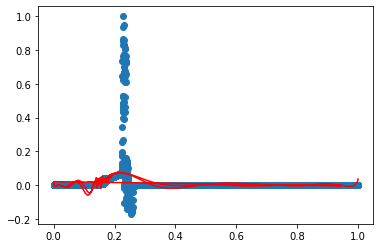

In [140]:
plt.scatter(X['Actuator'],Y)
plt.plot(X['Actuator'],y_pred,color = "red")

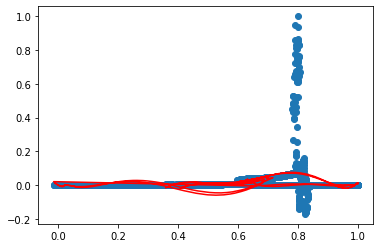

In [141]:
plt.scatter(X['Load'],Y)
plt.plot(X['Load'],y_pred,color = "red")

In [142]:
y_pred

array([0.01469297, 0.01521425, 0.01460905, ..., 0.02586711, 0.02908737,
       0.03689913])

In [143]:
Y_test

0       0.000003
1       0.000004
2       0.000021
3       0.000031
4       0.000031
          ...   
3539   -0.999995
3540   -0.999995
3541   -0.999995
3542   -0.999995
3543   -0.999995
Name: Strain, Length: 3544, dtype: float64

In [159]:
MAE = metrics.mean_absolute_error(Y_test, y_pred[:Y_test.shape[0]])
MSE = metrics.mean_squared_error(Y_test,y_pred[:Y_test.shape[0]])
RMSE = np.sqrt(MSE)
R_squared = result.rsquared
adjusted_R_squared = result.rsquared_adj

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print("Adjusted R squared value : " , adjusted_R_squared)

MSE (Mean Squared Error) :  0.4911505397194405
MAE (Mean Absolute Error):  0.5059719009816611
RMSE (Root Mean Squared Error ) :  0.7008213322377113
Adjusted R squared value :  0.08166011217622104


#### As we can see the linear regression model and the Polynomial linear regression model have the same MSE , MAE values and slight variation in the RMSE which means the Polynomial regression model is better and Polynomial regression model ignores the value of Load because it's very small and almost un significant.

In [145]:
print("Regression Equation: ")
xy = f"Y = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})Load + ({regression_model.coef_[1].round(3)})Actuator"
print(xy)

Regression Equation: 
Y = -0.007+ (0.0)Load + (-1.863)Actuator


In [146]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[X.columns[0],X.columns[1]], yx, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                                      MSE       MAE      RMSE    R-Squared    Adjusted R-Squared
----------------------  -----------------------------------------  --------  --------  --------  -----------  --------------------
['Load', 'Actuator']    Y = 0.033+ (0.003)Load + (-0.045)Actuator  0.491151  0.505972  0.700821    0.0819094             0.0816601


#### Therefore the final regression models are implemented and the model linear regression gives the equation 

In [147]:
print("Linear Regression Equation is : " , yx)

Linear Regression Equation is :  Y = 0.033+ (0.003)Load + (-0.045)Actuator


#### Polynomial Regression model will lead to the equation 

In [148]:
print("Polynomial Linear Regression Equation is : ",xy)

Polynomial Linear Regression Equation is :  Y = -0.007+ (0.0)Load + (-1.863)Actuator


#### Therefore by the RMSE values we can say that Polynomial linear regression model is a more accurate model than the Linear Regression

#### Exporting all the prediction values to a csv

In [166]:
df = pd.DataFrame(list(zip(y_pred,predictions)), columns=['Polynomial regression predictions','Linear regression predictions'])
df.to_csv('prediction.csv')